In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


## Read File

In [153]:
funnel_data = pd.read_csv('funnel.csv')
loan_repayment_data = pd.read_csv('repayment.csv')

## Data Cleaning

In [154]:
repayment['Origination Month'] = pd.to_datetime(repayment['Origination Month'])
funnel_data["Month"] = pd.to_datetime(funnel_data["Month"])

In [156]:
def clean_currency(value):
    return float(value.replace("$", "").replace(",", "")) if isinstance(value, str) else value

# Clean Funnel Performance Data
funnel_data["Application Submits"] = funnel_data["Application Submits"].str.replace(",", "").astype(int)
funnel_data["Origination Amount"] = funnel_data["Origination Amount"].apply(clean_currency)
funnel_data['Month'] = pd.to_datetime(funnel['Month'])


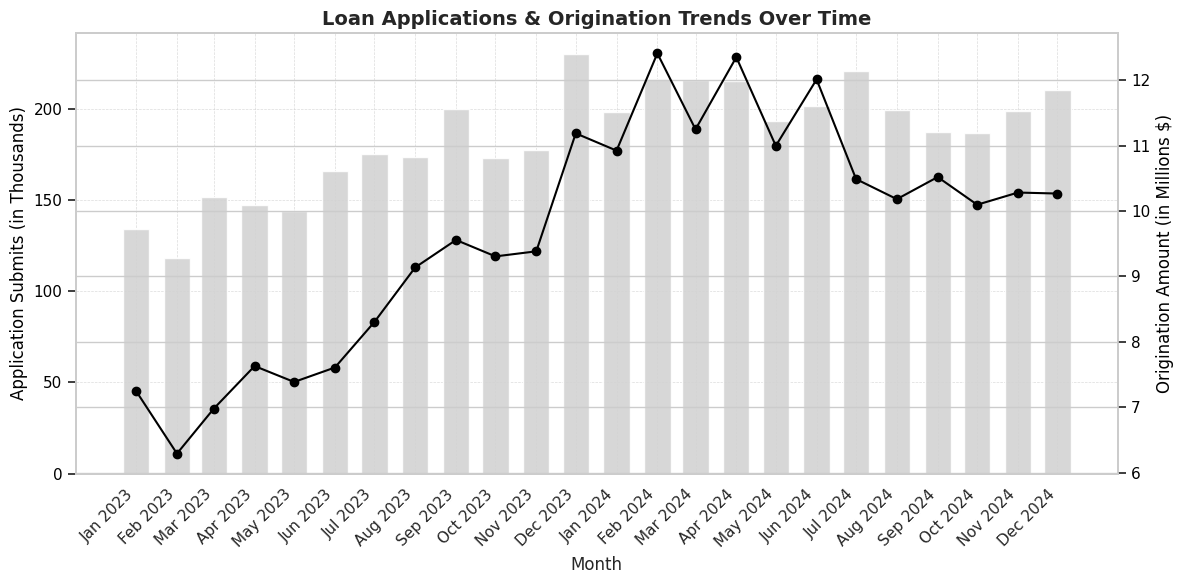

In [158]:
# Adjust colors: Light grey bars and black line

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Application Submits as shorter light grey bars
bar_width = 20  # Adjust bar width
ax1.bar(funnel_data["Month"], funnel_data["Application Submits"] / 1000, color='#D3D3D3', alpha=0.9, width=bar_width, label="Application Submits (in K)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Application Submits (in Thousands)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis for Origination Amount as a black line plot
ax2 = ax1.twinx()
ax2.plot(funnel_data["Month"], funnel_data["Origination Amount"] / 1e6, marker='o', linestyle='-', color='black', label="Origination Amount (in Millions)")
ax2.set_ylabel("Origination Amount (in Millions $)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Formatting the x-axis for monthly grain
ax1.set_xticks(funnel_data["Month"])
ax1.set_xticklabels(funnel_data["Month"].dt.strftime('%b %Y'), rotation=45, ha='right')

# Title and grid
plt.title("Loan Applications & Origination Trends Over Time", fontsize=14, fontweight='bold')
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Improve layout
fig.tight_layout()

# Show plot
plt.show()


In [180]:
jan_june_funnel_data = funnel_data[(funnel_data['Month'] >= '2024-01-01') & (funnel_data['Month'] <= '2024-06-01')]
jul_dec_funnel_data = funnel_data[(funnel_data['Month'] >= '2024-07-01')]


In [182]:
jan_june_funnel_data['Application Submits'].mean()

206948.0

In [184]:
jan_june_funnel_data['Origination Amount'].mean()

11656492.166666666

In [185]:
jul_dec_funnel_data['Application Submits'].mean()

200673.16666666666

In [186]:
jul_dec_funnel_data['Origination Amount'].mean()

10305186.333333334

In [36]:
loan_repayment_data["MAPE"] = abs(loan_repayment_data["Actual Loan Repayment"] - loan_repayment_data["Forecasted Loan Repayment"])/loan_repayment_data["Actual Loan Repayment"]


In [38]:
loan_repayment_data.groupby(['Model Version']).agg(xx = ('MAPE','mean'))

,xx
Model Version,
Model_A,0.010581
Model_B,0.025824


## Application Submits vs Origination $

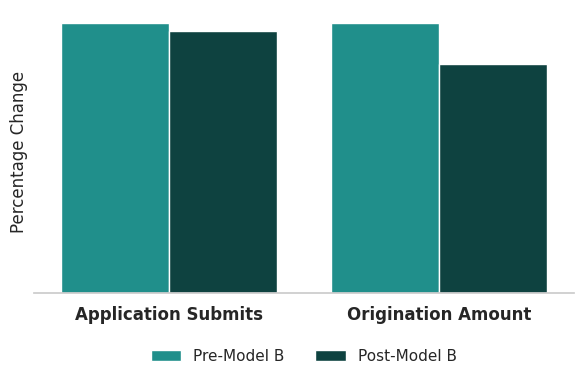

In [189]:
# Create the final version with only "Application Submits" and "Origination Amount" bolded
fig, ax = plt.subplots(figsize=(6, 4))
dark_teal_variants = ['#0da29c', '#064a48']

# Create barplot with updated order and colors
sns.barplot(data=df, x="Metric", y="Value", hue="Period", palette=dark_teal_variants, ax=ax)

# Move legend to the bottom
legend = ax.legend(title="", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Make only x-axis labels (Application Submits & Origination Amount) bold
plt.xticks(fontsize=12, fontweight="bold")

# Labels with refined text (No heading, only bold x-axis labels)
ax.set_ylabel("Percentage Change", fontsize=12)
ax.set_xlabel("")

# Remove background spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(True)

# Improve layout with modern font styling
plt.yticks([])  # Remove y-axis ticks for cleaner visualization
plt.tight_layout()

# Show the final polished plot
plt.show()


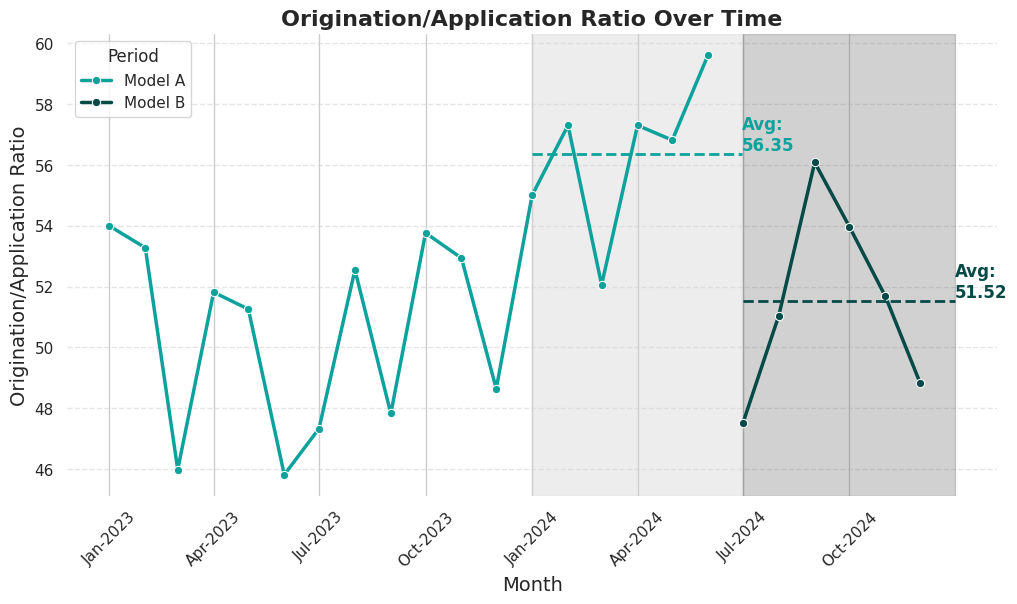

In [124]:
dark_teal_variants = ['#0da29c', '#064a48']  # Dark teal for Model A, Even darker teal for Model B

# Set seaborn style for consistency
sns.set_style("whitegrid")

# Plot Origination/Application Ratio over time with updated colors and labels
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=funnel_df, 
    x="Month", 
    y="Origination/Application Ratio", 
    hue="Period", 
    marker="o", 
    linewidth=2.5,
    palette=dark_teal_variants  # Using the standardized dark teal colors
)

# Highlight 6 months before and after Model B introduction with different shades of gray
ax.axvspan(highlight_pre_start, highlight_pre_end, color="lightgray", alpha=0.4)
ax.axvspan(highlight_post_start, highlight_post_end, color="dimgray", alpha=0.3)

# Draw dotted average lines **only within the 6-month segments**
ax.plot(
    [highlight_pre_start, highlight_pre_end], 
    [avg_model_a_pre, avg_model_a_pre], 
    linestyle="--", color=dark_teal_variants[0], linewidth=2
)

ax.plot(
    [highlight_post_start, highlight_post_end], 
    [avg_model_b_post, avg_model_b_post], 
    linestyle="--", color=dark_teal_variants[1], linewidth=2
)

# Label the averages with wrapped text
ax.text(highlight_pre_end, avg_model_a_pre, f"Avg:\n{avg_model_a_pre:.2f}", 
        verticalalignment="bottom", horizontalalignment="left",
        fontsize=12, color=dark_teal_variants[0], fontweight="bold")

ax.text(highlight_post_end, avg_model_b_post, f"Avg:\n{avg_model_b_post:.2f}", 
        verticalalignment="bottom", horizontalalignment="left",
        fontsize=12, color=dark_teal_variants[1], fontweight="bold")

# Formatting
ax.set_title("Origination/Application Ratio Over Time", fontsize=16, fontweight="bold")
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Origination/Application Ratio", fontsize=14)

# Set x-axis ticks and labels with December 2024 included
ax.set_xticks(selected_dates)
ax.set_xticklabels([pd.Timestamp(date).strftime("%b-%Y") for date in selected_dates], rotation=45, fontsize=11)

plt.yticks(fontsize=11)

# Remove legend and just label averages directly on the plot
plt.grid(axis="y", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=True)

# Show plot
plt.show()



In [190]:
funnel_data['Ratio'] = round(funnel_data['Origination Amount']/funnel_data['Application Submits'],2)

In [191]:
# Perform a one-sided Mann-Whitney U test on individual values (not just median comparison)
stat, p_value = mannwhitneyu(pre_july_2024, post_july_2024, alternative='greater')

# Prepare detailed results for appendix (showing all individual values comparison)
detailed_results = pd.DataFrame({
    "Month": list(pre_july_2024.index) + list(post_july_2024.index),
    "Period": ["Pre-July 2024"] * len(pre_july_2024) + ["Post-July 2024"] * len(post_july_2024),
    "Ratio": list(pre_july_2024) + list(post_july_2024)
})

# Highlight for slide
highlight = f"One-sided non-parametric test on individual values shows {'a significant' if p_value < 0.05 else 'no significant'} reduction in Origination/Application Ratio after July 2024 (p={p_value:.3f})."
highlight


'One-sided non-parametric test on individual values shows a significant reduction in Origination/Application Ratio after July 2024 (p=0.010).'